# Twitter Exploration

As a potential Data Analysis project I explored the publically available Tweeter API and what data can be easily accessed with it. I used the Tweepy library to wrap the Twitter API. I initially created a number of methods in Twitter_Access.py to exercise the search, home_timeline and user_timeline API methods and save the resulting data into .csv files for analysis with pandas.

In [33]:
import pandas as pd
import os
from datetime import datetime 
from Twitter_Access import get_twitter_api_obj
from Twitter_Access import get_users_timeline
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Markdown, display, HTML

cwd = os.getcwd()
print(cwd)

/Users/alisonkline/Code/TwitterExploration


I manually collected the twitter screen_names for some of the key democrate and republican twitter accounts.

Here they are:

Republican

| Twitter Screen Name | Description of account |
|---------------------|------------------------|
| @GOP | The Grand Old Party, aka The Republicans |
| @NRCC | The Republican Congressional Committee |
| @HouseGOP | The House Republicans |
| @SenateGOP | The Senate Republicans |

Democrate

| Twitter Screen Name | Description of account |
|---------------------|------------------------|
| @TheDemocrats | The Democrats |
| @DNC | The Democratic National Committee |
| @HouseDemocrats | The House Democrats |
| @SenateDemocrats | The Senate Democrats |

Then ran the user time_line method created in Twitter_Access.py on each account in turn to gather their tweet data. 

I need to create an API object first to handle the actual Twitter API authentication. This loads in the account keys I created and are linked to my private personal account. You can exchange them for your own by passing in a dictionary containing your values for 'consumer_key', 'consumer_secret', 'access_token', 'access_token_secret'.

In [2]:
api = get_twitter_api_obj()

In [3]:
#get_users_timeline(api, "TheDemocrats")

Obtained 1 tweet pages for user TheDemocrats.
Obtained 2 tweet pages for user TheDemocrats.
Obtained 3 tweet pages for user TheDemocrats.
Obtained 4 tweet pages for user TheDemocrats.
Obtained 5 tweet pages for user TheDemocrats.
Obtained 6 tweet pages for user TheDemocrats.
Obtained 7 tweet pages for user TheDemocrats.
Obtained 8 tweet pages for user TheDemocrats.
Obtained 9 tweet pages for user TheDemocrats.
Obtained 10 tweet pages for user TheDemocrats.
Obtained 11 tweet pages for user TheDemocrats.
Obtained 12 tweet pages for user TheDemocrats.
Obtained 13 tweet pages for user TheDemocrats.
Obtained 14 tweet pages for user TheDemocrats.
Obtained 15 tweet pages for user TheDemocrats.
Obtained 16 tweet pages for user TheDemocrats.


# Analysing the data

Initially just the two users @GOP and @TheDemocrats
The dumped .csv files are available in the Data directory so the first task is to import the data into two Pandas Dataframes.

In [3]:
rep = pd.read_csv(cwd+'/data/tweetsTimelineGOP.csv')
dem = pd.read_csv(cwd+'/data/tweetsTimelineTheDemocrats.csv')

In [4]:
def explore_columns(df1, df2):
    print('There are {} columns in both data sets :'.format(rep.shape[1]))
    for c in df1.columns.values:
        if c in df2.columns.values:
            print('   ' + c)
        else:
            print('Column ({}) only present in one dataset'.format(c))

explore_columns(rep, dem)

There are 11 columns in both data sets :
   id
   user.screen_name
   in_reply_to_screen_name
   created_at
   favorite_count
   favorited
   retweet_count
   retweeted
   truncated
   lang
   text


In [5]:
print('Number of Republican tweets {} vs Democrat tweets {}'.format(rep.shape[0], dem.shape[0]))

Number of Republican tweets 2339 vs Democrat tweets 2423


Giving a quick look at the top 5 entries in both data sets:

In [7]:
rep.head(5)

,id,user.screen_name,in_reply_to_screen_name,created_at,favorite_count,favorited,retweet_count,retweeted,truncated,lang,text
0,996066458131156992,GOP,NaN,2018-05-14 16:35:24,1950,False,555,False,False,en,Welcome to the United States Embassy in Jerusa...
1,996045253932191744,GOP,NaN,2018-05-14 15:11:08,2350,False,767,False,True,en,“On behalf of the 45th President of the United...
2,996025971617730562,GOP,NaN,2018-05-14 13:54:31,0,False,283,False,False,en,RT @GOPChairwoman: A promise made; a promise k...
3,996013617962242048,GOP,NaN,2018-05-14 13:05:26,0,False,1618,False,False,en,RT @WhiteHouse: Watch LIVE the dedication of @...
4,995790826818195456,GOP,NaN,2018-05-13 22:20:08,2409,False,815,False,True,en,"Joyce in Michigan: ""I'm the single mother of 2..."


In [8]:
dem.head(5)

,id,user.screen_name,in_reply_to_screen_name,created_at,favorite_count,favorited,retweet_count,retweeted,truncated,lang,text
0,996107161439821825,TheDemocrats,NaN,2018-05-14 19:17:08,0,False,74,False,False,en,RT @texasdemocrats: Polls are open! Go vote in...
1,996081316318842880,TheDemocrats,NaN,2018-05-14 17:34:26,169,False,119,False,True,en,"Under the Obama administration, the Department..."
2,995679471507267584,TheDemocrats,NaN,2018-05-13 14:57:39,518,False,205,False,True,en,Happy #MothersDay to all the moms across the c...
3,995464855917400066,TheDemocrats,NaN,2018-05-13 00:44:51,0,False,58,False,False,en,RT @CTDems: .@MayorMark won't stand up for our...
4,995425258185379841,TheDemocrats,NaN,2018-05-12 22:07:30,406,False,276,False,True,en,Oklahoma Republicans have passed a law that wi...


Neither data set should have any non-english tweets - but lets check:

In [6]:
str = 'Number of tweets in english : {0} from a total of {1} tweets so {2} foreign language tweets'
rep_en = rep['lang'].str.contains('en').value_counts()[True]
dem_en = dem['lang'].str.contains('en').value_counts()[True]
print(str.format(rep_en, rep.shape[0], rep.shape[0]-rep_en))
print(str.format(dem_en, dem.shape[0], dem.shape[0]-dem_en))

Number of tweets in english : 2339 from a total of 2339 tweets so 0 foreign language tweets
Number of tweets in english : 2423 from a total of 2423 tweets so 0 foreign language tweets


Lets see how many tweets were retweets and display any that were created by users that are not our two accounts of interest:

**** DOUBLE CHECK **** meaning on retweet flag given text "RT @CTDems: .@MayorMark won't stand up for our..." 4th from top - https://stackoverflow.com/questions/18869688/twitter-api-check-if-a-tweet-is-a-retweet
Retweeting: the old way was to add 'RT @' to the tweet but now their is a new formal Twitter API Retweet, the 'retweeted_status' appears only if retweeted and contains the original , 

In [7]:
print('Republicans have retweeted {} times'.format(len(rep[rep['retweeted']==True]['retweeted'])))
print('Democrats have retweeted {} times'.format(len(dem[dem['retweeted']==True]['retweeted'])))

Republicans have retweeted 0 times
Democrats have retweeted 0 times


In [11]:
rep[rep['user.screen_name'] != 'GOP']

,id,user.screen_name,in_reply_to_screen_name,created_at,favorite_count,favorited,retweet_count,retweeted,truncated,lang,text


In [12]:
dem[dem['user.screen_name'] != 'TheDemocrats']

,id,user.screen_name,in_reply_to_screen_name,created_at,favorite_count,favorited,retweet_count,retweeted,truncated,lang,text


As we would expect there are no tweets created by someone else as there are no tweets in either account that have the 'retweeted' flag set to True.

Now lets look at the in_reply_to_screen_name column: Have either party answered someone's tweets and if so who?

In [8]:
#len(rep.loc[rep['in_reply_to_screen_name'].notnull(),['in_reply_to_screen_name','text']])
#len(dem.loc[dem['in_reply_to_screen_name'].notnull(),['in_reply_to_screen_name','text']])
print(rep.in_reply_to_screen_name.value_counts())
print('Total tweets in response to someone: {}'.format(len(rep[rep['in_reply_to_screen_name'].notnull()])))
print(dem.in_reply_to_screen_name.value_counts())
print('Total tweets in response to someone: {}'.format(len(dem[dem['in_reply_to_screen_name'].notnull()])))

GOP                41
POTUS               1
realDonaldTrump     1
Name: in_reply_to_screen_name, dtype: int64
Total tweets in response to someone: 43
TheDemocrats    76
keithellison     1
Name: in_reply_to_screen_name, dtype: int64
Total tweets in response to someone: 77


Its interesting to note that by far the most common reply for both parties is replying to their own tweet, likely in an effort drive its interest and reach - Time to start looking at likes and favorites and maybe see if these relate to which tweets got responded too!

In [49]:
print("The tweet with the smallest number of favorites has {} favorites for the Democrats and {} for Republicans.".format(min(dem['favorite_count']), min(rep['favorite_count'])))
print("In fact the Democrats have {} tweets with 0 favorites and the Republicans have {}.".format(len(dem[dem['favorite_count'] == 0]),len(rep[rep['favorite_count'] == 0])))

display(Markdown('**5 of the Republican tweets with smallest favorite_count :**'))
display(rep.nsmallest(5,['favorite_count'])[['created_at', 'favorite_count', 'retweet_count', 'truncated', 'text']])
display(Markdown('**5 Republican tweets with largest favorite_count :**'))
display(rep.nlargest(5,['favorite_count'])[['created_at', 'favorite_count', 'retweet_count', 'truncated', 'text']])

display(Markdown('**5 of the  Democrat tweets with smallest favorite_count :**'))
display(dem.nsmallest(5,['favorite_count'])[['created_at', 'favorite_count', 'retweet_count', 'truncated', 'text']])
display(Markdown('**5 Democrat tweets with largest favorite_count :**'))
display(dem.nlargest(5,['favorite_count'])[['created_at', 'favorite_count', 'retweet_count', 'truncated', 'text']])

The tweet with the smallest number of favorites has 0 favorites for the Democrats and 0 for Republicans.
In fact the Democrats have 59 tweets with 0 favorites and the Republicans have 48.


**5 of the Republican tweets with smallest favorite_count :**

,created_at,favorite_count,retweet_count,truncated,text
2,2018-05-14 13:54:31,0,283,False,RT @GOPChairwoman: A promise made; a promise k...
3,2018-05-14 13:05:26,0,1618,False,RT @WhiteHouse: Watch LIVE the dedication of @...
14,2018-05-11 15:38:00,0,17804,False,RT @realDonaldTrump: Thank you Indiana! #MAGA🇺...
16,2018-05-10 19:52:00,0,363,False,RT @RNCResearch: CNN Poll: Approval of Trump’s...
18,2018-05-10 18:20:00,0,62953,False,RT @realDonaldTrump: The highly anticipated me...


**5 Republican tweets with largest favorite_count :**

,created_at,favorite_count,retweet_count,truncated,text
221,2018-04-15 21:02:31,26558,5081,False,Our entire RNC family offers prayers of comfor...
1575,2017-08-30 21:22:56,26092,7499,True,".@POTUS: I want to work with Congress, Republi..."
1555,2017-09-06 19:55:02,21920,5093,False,.@IvankaTrump: This administration is committe...
2289,2017-01-20 22:36:08,21030,5888,False,Congratulations to our newest Secretary of Def...
865,2018-01-09 01:40:54,18676,5062,False,"Oh, say does that star-spangled banner yet wav..."


**5 of the  Democrat tweets with smallest favorite_count :**

,created_at,favorite_count,retweet_count,truncated,text
0,2018-05-14 19:17:08,0,74,False,RT @texasdemocrats: Polls are open! Go vote in...
3,2018-05-13 00:44:51,0,58,False,RT @CTDems: .@MayorMark won't stand up for our...
5,2018-05-12 20:14:16,0,70,False,RT @INDems: Ready to elect more Hoosier Democr...
7,2018-05-12 15:46:49,0,65,False,RT @tammybaldwin: Working women get the job do...
11,2018-05-11 18:04:05,0,65,False,RT @Grace4NY: The administration is refusing t...


**5 Democrat tweets with largest favorite_count :**

,created_at,favorite_count,retweet_count,truncated,text
946,2017-11-08 03:23:50,21886,6219,False,"Hey @GOP, looks like America wants to be great..."
2291,2017-02-24 17:15:38,13739,6230,True,"A message from @HillaryClinton: ""Let resistanc..."
382,2018-03-14 05:13:46,11034,3146,True,We have our first flipped House seat of 2018! ...
551,2018-02-07 02:25:15,10161,3176,False,We're coming for every Republican in every sea...
695,2018-01-07 16:07:11,10002,3787,True,Let's elect:\n\n✅Black women\n✅LGBT women\n✅Mu...


Actually lets look at when they tweet first:
To manipulate the tweet created_at times effectively you need to create a Datetime object from the string:

In [9]:
def add_created_at_date_col(df):
    df['created_at_date_col'] = df['created_at'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

add_created_at_date_col(rep)
add_created_at_date_col(dem)

explore_columns(rep, dem)

There are 12 columns in both data sets :
   id
   user.screen_name
   in_reply_to_screen_name
   created_at
   favorite_count
   favorited
   retweet_count
   retweeted
   truncated
   lang
   text
   created_at_date_col


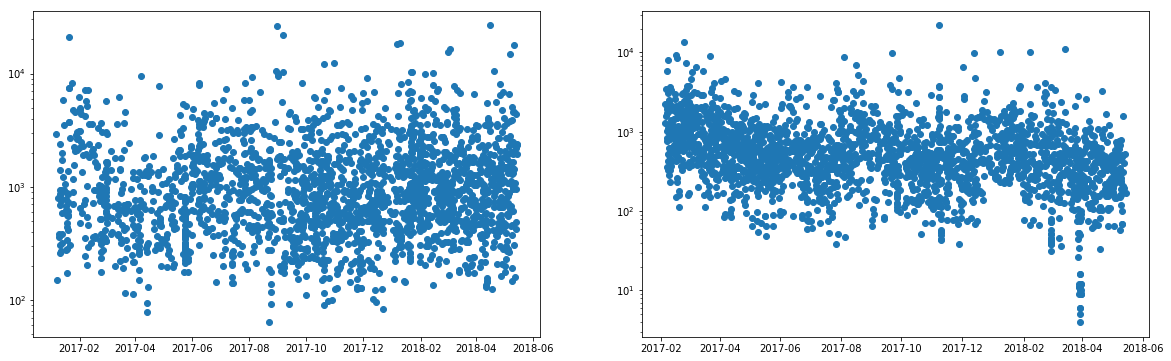

In [51]:
plt.rcParams["figure.figsize"] = (20,6)

plt.subplot(1,2,1)
dates = [matplotlib.dates.date2num(i) for i in rep['created_at_date_col']]
plt.plot_date(dates, rep['favorite_count'])
plt.yscale('log')
plt.xlabel = "Tweet created date"       # NOT SHOWING UP ON GRAPH
plt.ylabel = "Number of favorites/likes"
plt.title = 'Democrat tweets'

plt.subplot(1,2,2)
dates = [matplotlib.dates.date2num(i) for i in dem['created_at_date_col']]
plt.plot_date(dates, dem['favorite_count'])
plt.yscale('log')
plt.xlabel = "Tweet created date"       # NOT SHOWING UP ON GRAPH
plt.ylabel = "Number of favorites/likes"
plt.title = 'Republican tweets'

plt.show()

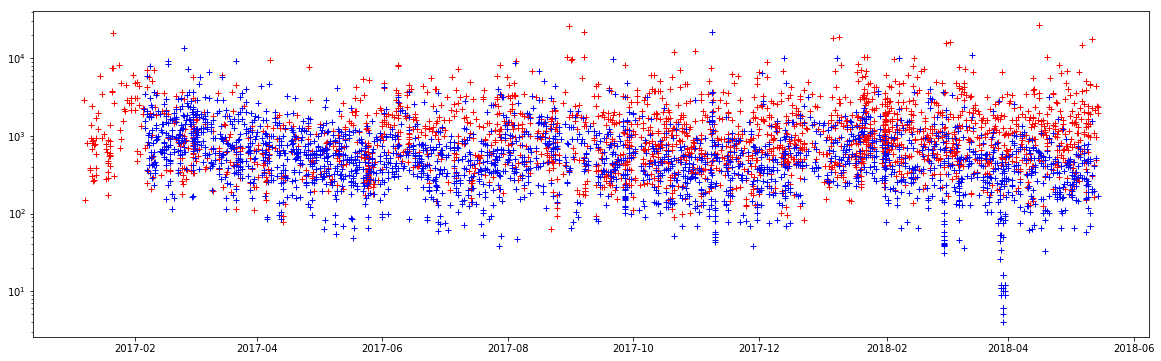

In [52]:
demdates = [matplotlib.dates.date2num(i) for i in dem['created_at_date_col']]
repdates = [matplotlib.dates.date2num(i) for i in rep['created_at_date_col']]
plt.plot_date(repdates, rep['favorite_count'], 'r+')
plt.plot_date(demdates, dem['favorite_count'], 'b+')
plt.yscale('log')
plt.show()

Looking at the plots above it looks like both parties get most of their tweets to be favorited between 100 and 5000 times, although the democrats have some low performing (from a favorited perspective) in Apr 2018. Both parties are also fairly consistent in volumn of tweets through out the 2+ year data period. It looks like the republicans may have been getting a little more frequent. Lets look at the most favoirted few tweets from each account:

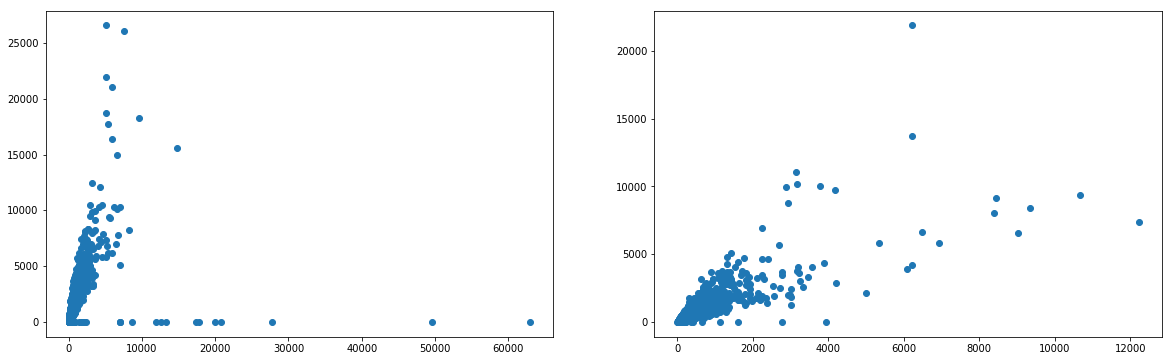

In [18]:
plt.subplot(1,2,1)
plt.scatter(rep['retweet_count'], rep['favorite_count'])
plt.xlabel = "Number of times tweet was retweeted"        # NOT SHOWING UP ON GRAPH
plt.ylabel = "Number of favorites/likes'"
plt.title = 'Republican tweets'

plt.subplot(1,2,2)
plt.scatter(dem['retweet_count'], dem['favorite_count'])
plt.xlabel = "Number of times tweet was retweeted"        # NOT SHOWING UP ON GRAPH
plt.ylabel = "Number of favorites/likes'"
plt.title = 'Democrat tweets'

plt.show()